
# Technical Test: Python and SQLAlchemy Proficiency

## Objective

This test is designed to assess your proficiency in Python programming and your understanding of Object-Relational Mapping (ORM) using SQLAlchemy. You will interact with a small database application in a Jupyter Notebook environment, showcasing your ability to manage and manipulate data effectively.

## Test Environment

The test will be conducted in a Jupyter Notebook hosted on GitHub. All necessary libraries, including SQLAlchemy, are pre-installed, and the environment is set up for you. You will work on a fork of the provided repository.

## Test Overview

You will complete a series of tasks that involve interacting with a small database application using Python and SQLAlchemy. The test will evaluate your ability to:

1. **Implement ORM Models**: Create Python classes that map to database tables using SQLAlchemy ORM, including fields, relationships, and constraints.

2. **Perform CRUD Operations**: Write Python code to perform Create, Read, Update, and Delete operations on the database using SQLAlchemy.

3. **Query Optimization**: Demonstrate your ability to write efficient queries, utilizing SQLAlchemy features to optimize database access.

4. **Handle Transactions**: Implement transaction management to ensure data integrity during complex operations.

5. **Documentation and Code Quality**: Provide clear documentation and adhere to best practices in code structure and style.

## Instructions

1. **Fork the Repository**: Start by forking the provided GitHub repository to your own account.

2. **Access the Jupyter Notebook**: Open the Jupyter Notebook in your forked repository to begin the test.

3. **Complete the Tasks**: Follow the instructions in the notebook to complete each task. Ensure your code is functional and meets the specified requirements.

4. **Use SQLAlchemy Documentation**: Refer to the [SQLAlchemy documentation](https://docs.sqlalchemy.org) as needed to assist with your implementation.

5. **Commit Your Changes**: Once you have completed the tasks, commit your changes to your forked repository.

6. **Submit Your Test**: Notify us by providing a link to your forked repository with your completed test.

## Evaluation Criteria

-  **Correctness**: The solution should meet all specified requirements and perform all operations correctly.
-  **Code Quality**: Code should be clean, well-organized, and follow Python best practices.
-  **Efficiency**: Solutions should be optimized for performance, especially in the context of database operations.
-  **Problem Solving**: Demonstrated ability to effectively solve problems and make sound design decisions.
-  **Documentation**: Clear and concise documentation that helps reviewers understand your approach and implementation.

We look forward to reviewing your work and assessing your potential to contribute to our development team.

In [1]:
import models as m
import sqlalchemy as sa

# First, let's connect to the database
engine = sa.create_engine("sqlite:///quiz.db")
SessionMaker = sa.orm.sessionmaker(autocommit=False, autoflush=False, bind=engine)
session = SessionMaker()

In [2]:
# example query sites
sites_query = sa.select(m.Site).limit(10)
sites = list(session.execute(sites_query).scalars())
print(sites)

[<Site n°1 - GigaWatt Llama Ranch>, <Site n°2 - Sunny Side of the Moon>, <Site n°3 - River Dance Powerhouse>, <Site n°4 - Turbine Nation Offshore>, <Site n°5 - Sunshine & Chill Canopy>, <Site n°6 - Watts in the Attic>, <Site n°7 - Flow like a River>, <Site n°8 - Juicy Biomass Co-op>, <Site n°9 - Offshore Avengers>, <Site n°10 - Trash into Cash>]


### Question 1 :

Based on all the sites in the db, make a summary of the modelled data. Please choose the best metrics to display and best grouping to do. (count, sum on some attribute grouped by another attribute etc...)

In [3]:
# Code here

from sqlalchemy import func

#taille des tables
nb_sites = session.query(m.Site).count()
nb_contracts = session.query(m.Contract).count()
nb_timestamps = session.query(m.TSRecords).count()
nb_factures = session.query(m.Invoice).count()

print("nombre de sites:", nb_sites)
print("nombre de contrats:", nb_contracts)
print("nombre de timestamp:s", nb_timestamps)
print("nombre de facture", nb_factures)

# compte de chaque techno et du nombre de sites associé.
techno = session.query(m.Site.techno, func.count(m.Site.techno)).group_by(m.Site.techno).all()
for nom, count in techno:
    print(nom,":", count)

# compte des factures par contrats
factures = session.query(m.Invoice.contract_id, func.count(m.Invoice.contract_id)).group_by(m.Invoice.contract_id).all()
for id, count in factures:
    contrat  = session.query(m.Contract).filter_by(id=id).first()
    print(contrat,':', count)



nombre de sites: 99
nombre de contrats: 18
nombre de timestamp:s 73
nombre de facture 73
cogeneration_biomass : 8
cogeneration_other : 3
cogeneration_waste : 6
hydro_turbine_pumped_storage : 8
hydro_turbine_reservoir : 8
hydro_turbine_run_of_river : 7
solar_field_canopy : 10
solar_field_ground_mounted : 11
solar_field_rooftop : 12
wind_turbine_offshore : 12
wind_turbine_onshore : 14
PO-1619-14 : 3
PO-7417-15 : 7
PO-6789-16 : 21
PO-1819-17 : 21
PO-3347-18 : 21


### Question 2: 
Could you plot a map and tell in which coutries are all the sites ? 
Is there any pb with a site ?

In [4]:
# Code here

# Ayant eu un problème avec bokeh.tile_providers, je n'ai pas pu afficher la carte.

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

#affichage dans le notebook
output_notebook()


# Extraction des cooordoonées
lat_query = sa.select(m.Site.latitude)
latitudes = [lat for (lat,) in session.execute(lat_query)]

long_query = sa.select(m.Site.longitude)
longitudes = [long for (long,) in session.execute(long_query)]

# Création de la figure

p = figure(title="World Map", x_axis_label='latitude', y_axis_label='longitude', 
           x_range=(-20000000, 20000000), y_range=(-10000000, 10000000),
           tools="pan,wheel_zoom,box_zoom,reset,save")
p.circle(x=latitudes, y=longitudes, size=10, color="red", alpha=0.6)
show(p)





Loading BokehJS ...

### Question 3:
- Get me sites that have timeseries configured. 
- which site has contract defined ?

In [5]:
# Code here

# Sites avec timeseries
Timeseries = session.query(m.TSRecords.site_id).group_by(m.TSRecords.site_id).all()
print("Sites avec timestamp:")
for (id,) in Timeseries:
    sites  = session.query(m.Site).filter_by(id=id).first()
    print(sites,':')

# Sites avec contrats

contrats = session.query(m.Contract.site_id).group_by(m.Contract.site_id).all()
print("Sites avec contrats:")
for (id,) in contrats:
    sites  = session.query(m.Site).filter_by(id=id).first()
    print(sites,':')




Sites avec timestamp:
Energy for the Brave :
Reservoir Dogs Energy :
Village Solaire :
Barrage Mont Sunny :
Mont Venteux :
Sites avec contrats:
GigaWatt Llama Ranch :
Sunny Side of the Moon :
River Dance Powerhouse :
Turbine Nation Offshore :
Sunshine & Chill Canopy :
Watts in the Attic :
Flow like a River :
Juicy Biomass Co-op :
Offshore Avengers :
Trash into Cash :
Pumped Up Hydro :
Sunset Boulevard Energy :
Windy Wizards :
Energy for the Brave :
Reservoir Dogs Energy :
Village Solaire :
Barrage Mont Sunny :
Mont Venteux :


### Question 4:
Focus on site with contracts

If you were to analyse the contracts, choose one that you would focus to leverage the most k€, why ?

In [6]:
# Code here

# cherchons le contrat avec le prix le plus élevé

contrat = session.query(m.Contract.purchase_order, m.Contract.price).order_by(m.Contract.price.desc()).first()

print("contrat:",contrat[0], ", prix:", contrat[1])

contrat: PO-6344-13 , prix: 39100.0


### Question 5:
Timeseries : 
- Could you plot monthly production & financial report for the sites that have timeseries ?

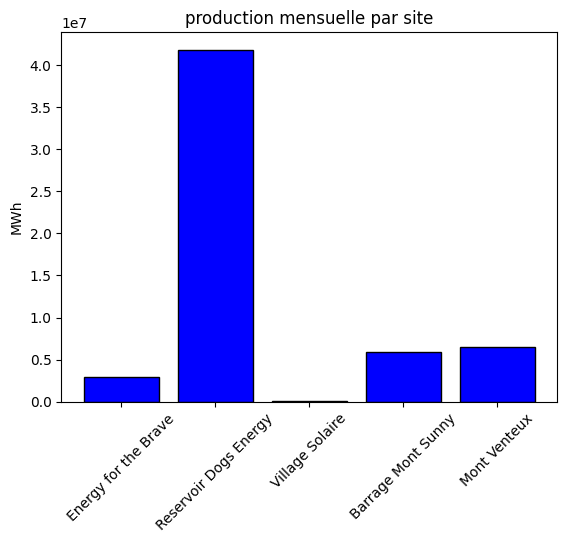

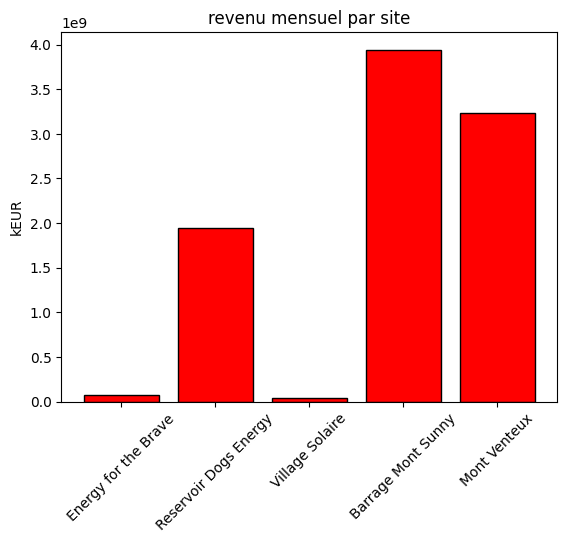

In [24]:
# Code here
import matplotlib.pyplot as plt

# production mensuelle par site
productions_par_site = session.query(m.TSRecords.site_id, func.sum(
    sa.case((m.TSRecords.unit_production == "kWh", m.TSRecords.production / 1_000),
                else_=m.TSRecords.production ))).group_by(m.TSRecords.site_id).all()

data = []
sites= []
for site_id, production in productions_par_site:
    site = session.query(m.Site).filter_by(id=site_id).first()
    data.append(int(production))
    sites.append(site.name)

plt.title("production mensuelle par site")
plt.bar(sites, data, color='b', edgecolor="black")
plt.xticks(rotation=45)
plt.ylabel('MWh')
plt.show()

plt.figure()

# revenu mensuel par site
revenu_par_site = session.query(m.TSRecords.site_id, func.sum(
    sa.case((m.TSRecords.unit_cashflow == "EUR", m.TSRecords.cashflow / 1_000),
                else_=m.TSRecords.cashflow ))).group_by(m.TSRecords.site_id).all()

data = []
sites= []
for site_id, cash in revenu_par_site:
    site = session.query(m.Site).filter_by(id=site_id).first()
    data.append(int(cash))
    sites.append(site.name)

plt.title("revenu mensuel par site")
plt.bar(sites, data, color='r', edgecolor="black")
plt.xticks(rotation=45)
plt.ylabel('kEUR')
plt.show()